In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import shuffle

In [ ]:
https://drive.google.com/file/d/1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7/view?usp=sharing

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 72.0MB/s]


In [3]:
df = pd.read_csv('/content/data_banknote_authentication.txt')
df

,x1,x2,x3,x4,y
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
shuffled_data = shuffle(df)
shuffled_data.to_csv('created_data.csv', index=False)
print(shuffled_data)

           x1       x2        x3       x4  y
922  -1.41740  -2.2535   1.51800  0.61981  1
461   3.09480   8.7324  -2.90070 -0.96682  0
35    2.43910   6.4417  -0.80743 -0.69139  0
1009 -3.57130 -12.4922  14.88810 -0.47027  1
263   4.98800   7.2052  -3.28460 -1.16080  0
...       ...      ...       ...      ... ..
1258 -0.62043   0.5587  -0.38587 -0.66423  1
370   2.25260   9.9636  -3.17490 -2.99440  0
1124 -1.75890  -6.4624   8.47730  0.31981  1
606  -1.42750  11.8797   0.41613 -6.99780  0
485   3.65750   7.2797  -2.26920 -1.14400  0

[1372 rows x 5 columns]


In [5]:
df1 = pd.read_csv('/content/created_data.csv')
df1

,x1,x2,x3,x4,y
0,-1.41740,-2.2535,1.51800,0.61981,1
1,3.09480,8.7324,-2.90070,-0.96682,0
2,2.43910,6.4417,-0.80743,-0.69139,0
3,-3.57130,-12.4922,14.88810,-0.47027,1
4,4.98800,7.2052,-3.28460,-1.16080,0
...,...,...,...,...,...
1367,-0.62043,0.5587,-0.38587,-0.66423,1
1368,2.25260,9.9636,-3.17490,-2.99440,0
1369,-1.75890,-6.4624,8.47730,0.31981,1
1370,-1.42750,11.8797,0.41613,-6.99780,0


Logistic Regression (from Scratch)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

Binary Cross Entropy (BCE)

In [8]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

Gradient

In [9]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

Gradient Descent

In [10]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

Accuracy

In [11]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

validatin آموزش داده های

In [12]:
X = df1[['x1','x2','x3','x4']].values
y = df1[['y']].values
X, y

(array([[-1.4174 , -2.2535 ,  1.518  ,  0.61981],
        [ 3.0948 ,  8.7324 , -2.9007 , -0.96682],
        [ 2.4391 ,  6.4417 , -0.80743, -0.69139],
        ...,
        [-1.7589 , -6.4624 ,  8.4773 ,  0.31981],
        [-1.4275 , 11.8797 ,  0.41613, -6.9978 ],
        [ 3.6575 ,  7.2797 , -2.2692 , -1.144  ]]),
 array([[1],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]]))

تقسیم داده ها به دو دسته آموزش و اعتبارسنجی

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [51]:
y_hat = logistic_regression(x_test, np.random.randn(4, 1))
print(y_hat.shape)

(275, 1)


In [52]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test.shape

(275, 5)

In [53]:
m = 4
w = np.random.randn(m+1, 1)
print(w.shape)

(5, 1)


In [54]:
eta = 0.01
n_epochs =100000 #N

In [55]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_test, w)

    # loss
    e = bce(y_test, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_test, y_test, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) %  1== 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Streaming output truncated to the last 5000 lines.
Epoch=95000, 	 E=0.01329,	 w=[ 4.14440767 -3.96170344 -2.346805   -2.76594836 -0.21020948]
Epoch=95001, 	 E=0.01329,	 w=[ 4.14441752 -3.9617148  -2.34681093 -2.76595566 -0.21021032]
Epoch=95002, 	 E=0.01329,	 w=[ 4.14442737 -3.96172615 -2.34681686 -2.76596296 -0.21021116]
Epoch=95003, 	 E=0.01329,	 w=[ 4.14443721 -3.96173751 -2.34682278 -2.76597025 -0.210212  ]
Epoch=95004, 	 E=0.01329,	 w=[ 4.14444706 -3.96174887 -2.34682871 -2.76597755 -0.21021284]
Epoch=95005, 	 E=0.01329,	 w=[ 4.14445691 -3.96176022 -2.34683464 -2.76598485 -0.21021368]
Epoch=95006, 	 E=0.01329,	 w=[ 4.14446676 -3.96177158 -2.34684057 -2.76599215 -0.21021452]
Epoch=95007, 	 E=0.01329,	 w=[ 4.1444766  -3.96178293 -2.3468465  -2.76599945 -0.21021536]
Epoch=95008, 	 E=0.01329,	 w=[ 4.14448645 -3.96179429 -2.34685243 -2.76600674 -0.2102162 ]
Epoch=95009, 	 E=0.01329,	 w=[ 4.1444963  -3.96180564 -2.34685835 -2.76601404 -0.21021704]
Epoch=95010, 	 E=0.01329,	 w=[ 4.144506

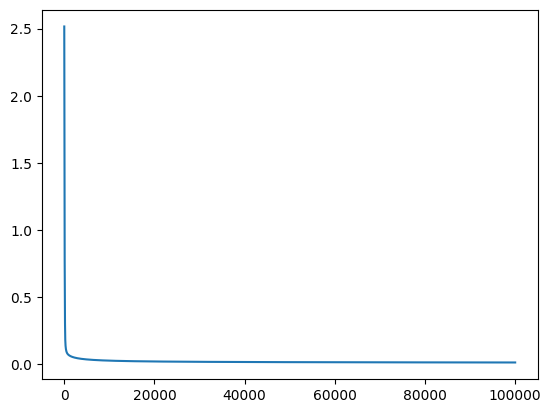

In [56]:
plt.plot(error_hist)

In [ ]:
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

0.9927272727272727